## **13. Recomendation system**



## **1. Instalación y Importaciones**

In [86]:
!pip install missingno MissForest

In [169]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from missforest import MissForest
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score, classification_report
from statsmodels.tools.tools import add_constant



## **2. Abrimos Database**

In [88]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=2326&path=adult-census-income.csv"
df = pd.read_csv(url)

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## **3.Descripción de Variables:**

In [89]:
for col in df.columns:
    print(f"\nColumna: {col}")

    # Conteos absolutos
    conteos = df[col].value_counts(dropna=False)

    # Porcentajes
    porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combinar en un solo DataFrame
    resumen = pd.DataFrame({
        'Conteo': conteos,
        'Porcentaje (%)': porcentajes.round(2)
    })

    print(resumen)


Columna: age
     Conteo  Porcentaje (%)
age                        
36      898            2.76
31      888            2.73
34      886            2.72
23      877            2.69
35      876            2.69
..      ...             ...
83        6            0.02
88        3            0.01
85        3            0.01
86        1            0.00
87        1            0.00

[73 rows x 2 columns]

Columna: workclass
                  Conteo  Porcentaje (%)
workclass                               
Private            22696           69.70
Self-emp-not-inc    2541            7.80
Local-gov           2093            6.43
?                   1836            5.64
State-gov           1298            3.99
Self-emp-inc        1116            3.43
Federal-gov          960            2.95
Without-pay           14            0.04
Never-worked           7            0.02

Columna: fnlwgt
        Conteo  Porcentaje (%)
fnlwgt                        
164190      13            0.04
203488      13    

## **4. Cribado Manual**

## 4.1 Reemplazar Valores Atipicos por NAN

In [90]:
df['workclass'] = df['workclass'].replace('?', np.nan)

In [91]:
df['native.country'] = df['native.country'].replace('?', np.nan)

In [92]:
df['occupation'] = df['occupation'].replace('?', np.nan)

## 4.2 Identificar columnas con columnas constantes

In [93]:
unicos = df.nunique()
df[unicos[unicos==1].index]
df[unicos[unicos==1].index].head(5)

""
0
1
2
3
4


## 4.3. Eliminamos filas y columnas duplicadas. Se eliminan 12 filas

In [94]:
df.duplicated().sum()

np.int64(24)

In [95]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
19622,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
10307,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
17456,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
22934,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
32065,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
9269,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K


In [96]:
# Identificar duplicados
duplicados = df.duplicated(keep='first')

# Ver filas que se eliminarían
df[duplicados]

# Eliminar esas filas
df = df[~duplicados]


In [97]:
df.T.duplicated().sum()

np.int64(0)

In [98]:
df.T.duplicated(keep=False)

,0
age,False
workclass,False
fnlwgt,False
education,False
education.num,False
marital.status,False
occupation,False
relationship,False
race,False
sex,False


## 4.4 Eliminar Columnas redundantes.

In [99]:
pd.set_option('display.max_columns', None)
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


#Eliminar Fnlgt, Education, Relationship, race, sex.

In [100]:
# Lista de columnas a eliminar
cols_a_eliminar = ['fnlwgt', 'education', 'relationship', 'race', 'sex']

# Eliminar columnas
df = df.drop(columns=cols_a_eliminar)

# Ver las primeras filas para confirmar
df.head()


,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,0,3900,40,United-States,<=50K


## **5. Eliminar columnas Data leakage** Las eliminamos mas adelante.

In [101]:
##df.drop('income', axis=1, inplace=True)

## **6. Analizar Valores sin sentido** No tenemos valores sin sentido

## **7. Valores faltantes por columna** Tiene que ser mayor a 40 % Para poder eliminarlas- mnar, mar, mcar. ##

In [102]:
df.shape

(32537, 10)

In [103]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

,0
workclass,5.642807
occupation,5.664321
native.country,1.788733


## **8. Valores faltantes por filas.**

In [104]:
df.isnull().any(axis=1).sum()

np.int64(2398)

In [105]:
n = 2
df[df.isnull().sum(axis=1) ==n]

,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,0,4356,40,United-States,<=50K
2,66,NaN,10,Widowed,NaN,0,4356,40,United-States,<=50K
14,51,NaN,16,Never-married,NaN,0,2824,40,United-States,>50K
24,61,NaN,9,Married-civ-spouse,NaN,0,2603,32,United-States,<=50K
44,71,NaN,9,Married-civ-spouse,NaN,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
32533,35,NaN,13,Married-civ-spouse,NaN,0,0,55,United-States,>50K
32534,30,NaN,13,Never-married,NaN,0,0,99,United-States,<=50K
32541,71,NaN,16,Married-civ-spouse,NaN,0,0,10,United-States,>50K
32543,41,NaN,9,Separated,NaN,0,0,32,United-States,<=50K


In [106]:
n = 3
df[df.isnull().sum(axis=1) ==n]

,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
1181,68,NaN,4,Widowed,NaN,0,1668,40,NaN,<=50K
1204,41,NaN,11,Married-civ-spouse,NaN,0,1628,5,NaN,<=50K
2591,38,NaN,13,Married-civ-spouse,NaN,7688,0,50,NaN,>50K
3415,47,NaN,9,Married-civ-spouse,NaN,3942,0,40,NaN,<=50K
3508,39,NaN,14,Married-civ-spouse,NaN,3464,0,40,NaN,<=50K
4284,32,NaN,4,Married-spouse-absent,NaN,0,0,40,NaN,<=50K
5229,24,NaN,10,Never-married,NaN,0,0,40,NaN,<=50K
5674,64,NaN,9,Married-civ-spouse,NaN,0,0,40,NaN,>50K
6932,25,NaN,10,Never-married,NaN,0,0,40,NaN,<=50K
7324,21,NaN,13,Never-married,NaN,0,0,25,NaN,<=50K


In [107]:
n = 4
df[df.isnull().sum(axis=1) ==n]

,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,income


In [108]:
n = 5
df[df.isnull().sum(axis=1) ==n]

,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,income


In [109]:
n = 6
df[df.isnull().sum(axis=1) ==n]

,age,workclass,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,income


<Axes: >

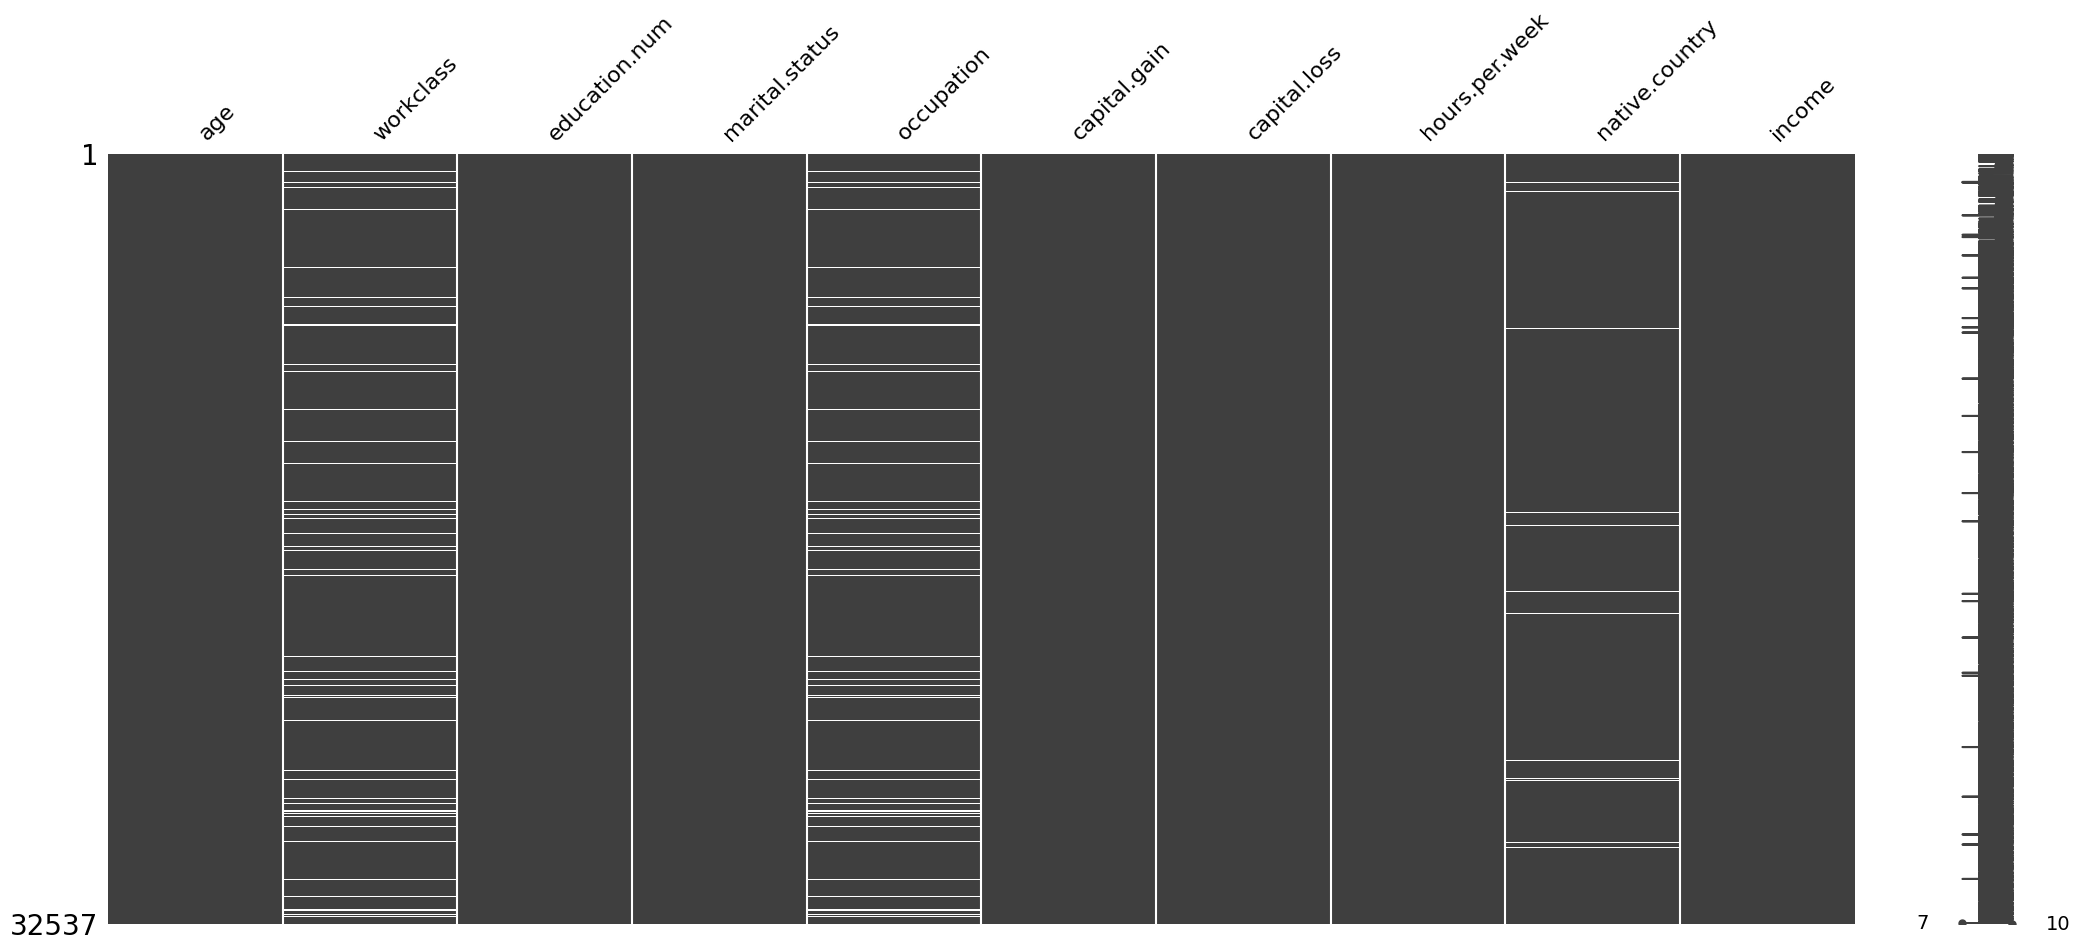

In [110]:
msno.matrix(df)

In [111]:
# Filas donde workclass y occupation son NaN al mismo tiempo
nan_both = df[df['workclass'].isna() & df['occupation'].isna()]

# Contar cuántas son
num_nan_both = nan_both.shape[0]
print(f"Filas con NaN en workclass **y** occupation: {num_nan_both}")

Filas con NaN en workclass **y** occupation: 1836


In [112]:
# Contar NaN en cada columna por separado
num_nan_workclass = df['workclass'].isna().sum()
num_nan_occupation = df['occupation'].isna().sum()

print(f"Filas con NaN en workclass: {num_nan_workclass}")
print(f"Filas con NaN en occupation: {num_nan_occupation}")


Filas con NaN en workclass: 1836
Filas con NaN en occupation: 1843


In [113]:
# Filas donde workclass es NaN
nan_workclass = df[df['workclass'].isna()]

# Ahora sí puedes seleccionar columnas y describir
print("=== Estadísticas de age y education.num para workclass NaN ===")
print(nan_workclass[['age', 'education.num', 'capital.gain','capital.loss']].describe())


=== Estadísticas de age y education.num para workclass NaN ===
               age  education.num  capital.gain  capital.loss
count  1836.000000    1836.000000   1836.000000   1836.000000
mean     40.960240       9.260349    606.795752     60.760349
std      20.334587       2.601986   5147.323872    354.685264
min      17.000000       1.000000      0.000000      0.000000
25%      21.000000       9.000000      0.000000      0.000000
50%      35.000000       9.000000      0.000000      0.000000
75%      61.000000      10.000000      0.000000      0.000000
max      90.000000      16.000000  99999.000000   4356.000000


In [114]:
# Filas donde occupation es NaN
nan_occupation = df[df['occupation'].isna()]

# Ahora sí puedes seleccionar columnas y describir
print("=== Estadísticas de age, education.num, capital.gain y capital.loss para occupation NaN ===")
print(nan_occupation[['age', 'education.num', 'capital.gain','capital.loss']].describe())


=== Estadísticas de age, education.num, capital.gain y capital.loss para occupation NaN ===
              age  education.num  capital.gain  capital.loss
count  1843.00000    1843.000000   1843.000000   1843.000000
mean     40.88280       9.253391    604.491047     60.529571
std      20.33635       2.602791   5137.669748    354.030421
min      17.00000       1.000000      0.000000      0.000000
25%      21.00000       9.000000      0.000000      0.000000
50%      35.00000       9.000000      0.000000      0.000000
75%      61.00000      10.000000      0.000000      0.000000
max      90.00000      16.000000  99999.000000   4356.000000


##  **9. Convertir variables Y a binaria.**  No hace falta

## **10. Categorizar variables string**

In [115]:
categoricas = df.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index(['workclass', 'marital.status', 'occupation', 'native.country',
       'income'],
      dtype='object')


##Para Workclass:

In [116]:
workclass_map = {
    'Private': 'Private',

    'Self-emp-not-inc': 'Self-employed',
    'Self-emp-inc': 'Self-employed',

    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Federal-gov': 'Government',

    'Without-pay': 'Unemployed',
    'Never-worked': 'Unemployed',


}

In [117]:
df['workclass_grouped'] = df['workclass'].map(workclass_map)
df['workclass_grouped'].value_counts(normalize=True) * 100

,proportion
workclass_grouped,
Private,73.851015
Government,14.172177
Self-employed,11.908407
Unemployed,0.068402


In [118]:
num_map = {
    'Private': 0,
    'Self-employed': 1,
    'Government': 2,
    'Unemployed': 3,
    'nan': 4
}

df['workclass_encoded'] = df['workclass_grouped'].map(num_map)

In [119]:
df[['workclass', 'workclass_encoded']].head(10)

,workclass,workclass_encoded
0,NaN,NaN
1,Private,0.0
2,NaN,NaN
3,Private,0.0
4,Private,0.0
5,Private,0.0
6,Private,0.0
7,State-gov,2.0
8,Federal-gov,2.0
9,Private,0.0


## Para Marital Status:

In [120]:
marital_map = {
    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',

    'Never-married': 'Never-married',

    'Divorced': 'Previously-married',
    'Separated': 'Previously-married',
    'Widowed': 'Previously-married',
    'Married-spouse-absent': 'Previously-married'
}


In [121]:
df['marital_grouped'] = df['marital.status'].map(marital_map)
df['marital_grouped'].value_counts(normalize=True) * 100

,proportion
marital_grouped,
Married,46.079848
Never-married,32.784215
Previously-married,21.135938


In [122]:
num_map2 = {
    'Marriel': 0,
    'Never-married': 1,
    'Previously-married': 2
}

df['marital_encoded'] = df['marital_grouped'].map(num_map2)

In [123]:
df[['marital.status', 'marital_encoded']].head(10)

,marital.status,marital_encoded
0,Widowed,2.0
1,Widowed,2.0
2,Widowed,2.0
3,Divorced,2.0
4,Separated,2.0
5,Divorced,2.0
6,Separated,2.0
7,Never-married,1.0
8,Divorced,2.0
9,Never-married,1.0


##Para Occupation:

In [124]:
occupation_map = {
    # White collar
    'Prof-specialty': 'professional',
    'Tech-support': 'professional',
    'Exec-managerial': 'professional',
    'Adm-clerical': 'professional',

    # Sales & Services
    'Sales': 'Sales-Service',
    'Other-service': 'Sales-Service',
    'Protective-serv': 'Sales-Service',
    'Priv-house-serv': 'Sales-Service',

    # Blue collar
    'Craft-repair': 'tecnico',
    'Machine-op-inspct': 'tecnico',
    'Handlers-cleaners': 'tecnico',
    'Transport-moving': 'tecnico',

    # Others
    'Farming-fishing': 'Agriculture',
    'Armed-Forces': 'Military',
}




In [125]:
df['occupation_grouped'] = df['occupation'].map(occupation_map)
df['occupation_grouped'].value_counts(normalize=True) * 100



,proportion
occupation_grouped,
professional,42.014726
tecnico,29.517169
Sales-Service,25.206881
Agriculture,3.231902
Military,0.029322


In [126]:
num_map3 = {
    'professional': 0,
    'tecnico': 1,
    'sales-service': 2,
    'agriculture': 3,
    'military': 4
}

df['occupation_encoded'] = df['occupation_grouped'].map(num_map3)


In [127]:
df[['occupation', 'occupation_encoded']].head(10)


,occupation,occupation_encoded
0,NaN,NaN
1,Exec-managerial,0.0
2,NaN,NaN
3,Machine-op-inspct,1.0
4,Prof-specialty,0.0
5,Other-service,NaN
6,Adm-clerical,0.0
7,Prof-specialty,0.0
8,Prof-specialty,0.0
9,Craft-repair,1.0


## Para Native-country:

In [128]:
country_map = {
    'United-States': 'United-States',

    # Latin America
    'Mexico': 'Latin-America',
    'Puerto-Rico': 'Latin-America',
    'El-Salvador': 'Latin-America',
    'Cuba': 'Latin-America',
    'Dominican-Republic': 'Latin-America',
    'Guatemala': 'Latin-America',
    'Honduras': 'Latin-America',
    'Nicaragua': 'Latin-America',
    'Peru': 'Latin-America',
    'Ecuador': 'Latin-America',
    'Columbia': 'Latin-America',

    # Europe
    'Germany': 'Europe',
    'England': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Greece': 'Europe',
    'France': 'Europe',
    'Ireland': 'Europe',
    'Scotland': 'Europe',
    'Hungary': 'Europe',
    'Yugoslavia': 'Europe',
    'Holand-Netherlands': 'Europe',

    # Asia
    'Philippines': 'Asia',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Taiwan': 'Asia',
    'Vietnam': 'Asia',
    'Thailand': 'Asia',
    'Laos': 'Asia',
    'Cambodia': 'Asia',
    'Hong': 'Asia',

    # Others
    'Canada': 'North-America',
    'Jamaica': 'Caribbean',
    'Haiti': 'Caribbean',
    'Trinadad&Tobago': 'Caribbean',
    'Outlying-US(Guam-USVI-etc)': 'Other',


}

df['native_country_grouped'] = df['native.country'].map(country_map)


In [129]:
df['native_country_grouped'] = df['native.country'].map(country_map)
df['native_country_grouped'].value_counts(normalize=True) * 100

,proportion
native_country_grouped,
United-States,91.583941
Latin-America,3.930008
Asia,1.972858
Europe,1.636718
Caribbean,0.452375
North-America,0.380121
Other,0.043981


In [130]:
num_map4 = {
    'United-States': 0,
    'Latin-America': 1,
    'Europe': 2,
    'Asia': 3,
    'North-America': 4,
    'Caribbean': 5,
    'Other': 6
}

df['native_country_encoded'] = df['native_country_grouped'].map(num_map4)

In [131]:
df[['native.country', 'native_country_encoded']].head(10)


,native.country,native_country_encoded
0,United-States,0.0
1,United-States,0.0
2,United-States,0.0
3,United-States,0.0
4,United-States,0.0
5,United-States,0.0
6,United-States,0.0
7,United-States,0.0
8,United-States,0.0
9,NaN,NaN


## Para Income

In [132]:
income_map = {
    '<=50K': 0,
    '>50K': 1
}

df['income_binary'] = df['income'].map(income_map)

In [133]:
df['income_binary'].value_counts(normalize=True) * 100

,proportion
income_binary,
0,75.907428
1,24.092572


## **11. Borrar las variables que estaban de Sring**

In [134]:
df.drop(
    ['workclass', 'marital.status', 'occupation', 'native.country',
     'income', 'workclass_grouped', 'marital_grouped', 'occupation_grouped', 'native_country_grouped'],
    axis=1,
    inplace=True
)


## **12. Hacer Train-Split**

In [135]:
X = df.drop('income_binary',axis=1)
y = df['income_binary']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **13. Imputar**

In [137]:
X_train[['workclass_encoded','occupation_encoded', 'marital_encoded', 'native_country_encoded']]

,workclass_encoded,occupation_encoded,marital_encoded,native_country_encoded
32239,1.0,NaN,NaN,0.0
30377,0.0,NaN,NaN,0.0
5455,1.0,NaN,NaN,3.0
19698,0.0,1.0,2.0,0.0
23193,0.0,0.0,NaN,0.0
...,...,...,...,...
29823,0.0,1.0,NaN,0.0
5390,0.0,0.0,NaN,0.0
860,2.0,0.0,NaN,0.0
15800,0.0,NaN,1.0,0.0


In [138]:
# Distribución porcentual de cada categoría
print(X_train['workclass_encoded'].value_counts(normalize=True) * 100)
print(X_train['occupation_encoded'].value_counts(normalize=True) * 100)
print(X_train['marital_encoded'].value_counts(normalize=True) * 100)
print(X_train['native_country_encoded'].value_counts(normalize=True) * 100)


workclass_encoded
0.0    73.812042
2.0    14.267697
1.0    11.842962
3.0     0.077299
Name: proportion, dtype: float64
occupation_encoded
0.0    58.628118
1.0    41.371882
Name: proportion, dtype: float64
marital_encoded
1.0    60.726213
2.0    39.273787
Name: proportion, dtype: float64
native_country_encoded
0.0    91.673540
1.0     3.841169
3.0     1.995208
2.0     1.629944
5.0     0.455599
4.0     0.361337
6.0     0.043203
Name: proportion, dtype: float64


In [139]:

# Convertir columnas categóricas a category
categorical_cols = ['workclass_encoded','occupation_encoded','marital_encoded','native_country_encoded']





In [140]:
X_train[categorical_cols].dtypes

,0
workclass_encoded,float64
occupation_encoded,float64
marital_encoded,float64
native_country_encoded,float64


In [141]:
imputer = MissForest()
X_train_float = X_train.astype(float)
# Imputar todo el DataFrame
X_train_imp = imputer.fit_transform(X_train_float)

# Convertir de nuevo a DataFrame
X_train_imp = pd.DataFrame(X_train_imp, columns=X_train.columns, index=X_train.index)

/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 5/5 [00:20<00:00,  4.05s/it]
/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process 

## **14. Outliers**

In [142]:
X_train_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
age,26029.0,38.606938,13.657408,17.000000,28.0,37.000000,48.000000,90.000000
education.num,26029.0,10.089477,2.566412,1.000000,9.0,10.000000,12.000000,16.000000
capital.gain,26029.0,1107.273272,7521.295717,0.000000,0.0,0.000000,0.000000,99999.000000
capital.loss,26029.0,88.615198,406.942441,0.000000,0.0,0.000000,0.000000,4356.000000
hours.per.week,26029.0,40.441892,12.380490,1.000000,40.0,40.000000,45.000000,99.000000
workclass_encoded,26029.0,0.411807,0.710816,-0.133689,0.0,0.000000,0.912682,3.000000
marital_encoded,26029.0,1.403501,0.392688,0.809310,1.0,1.314949,1.720541,2.160001
occupation_encoded,26029.0,0.402671,0.436299,-0.524718,0.0,0.167646,1.000000,1.088659
native_country_encoded,26029.0,0.172197,0.658367,-0.228078,0.0,0.000000,0.000000,6.000000


In [143]:
iso = IsolationForest(random_state=123)
df_num = X_train_imp.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train_imp)

In [144]:
df_num['outlier_flag'].value_counts()

,count
outlier_flag,
1,22680
-1,3349


## **15. Selección de características**

## Método 1: Feature importance de RF

In [145]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
# Importancia de características
importances = model.feature_importances_/model.feature_importances_.sum()*100

# Convertir a DataFrame
df_rf_imp = pd.DataFrame({'feature': X_train_imp.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()

In [147]:
df_rf_imp

,feature,rf_importance,rf_importance_acum
0,age,24.975944,24.975944
6,marital_encoded,18.767098,43.743042
2,capital.gain,15.018834,58.761875
1,education.num,14.550189,73.312065
4,hours.per.week,12.887772,86.199836
3,capital.loss,4.733677,90.933513
5,workclass_encoded,3.435789,94.369302
7,occupation_encoded,3.377805,97.747107
8,native_country_encoded,2.252893,100.000000


Método 2: Permutation/Shuffle importance

In [148]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train_imp, y_train, test_size=0.2, random_state=42)
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train1, y_train1)


RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [149]:


perm = permutation_importance(
    model_rf,
    X_val,
    y_val,
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)


In [150]:
df_perm = pd.DataFrame({
    'feature': X_val.columns,
    'perm_importance_mean': perm.importances_mean,
    'perm_importance_std': perm.importances_std
}).sort_values(by='perm_importance_mean', ascending=False)

df_perm


,feature,perm_importance_mean,perm_importance_std
6,marital_encoded,0.117258,0.004759
2,capital.gain,0.045924,0.002132
1,education.num,0.037352,0.001962
0,age,0.024613,0.001355
3,capital.loss,0.014220,0.000779
4,hours.per.week,0.013208,0.001452
7,occupation_encoded,0.008167,0.001222
5,workclass_encoded,0.000692,0.000185
8,native_country_encoded,0.000236,0.000149


Método 3: SHAP

In [151]:

model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train1, y_train1)
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_val)


In [152]:
shap_vals = shap_values[:, :, 1]
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap / imp_shap.sum() * 100

df_shap_imp = pd.DataFrame({
    "feature": X_val.columns,
    "shap_imp": imp_shap_pct
}).sort_values("shap_imp", ascending=False)

df_shap_imp


,feature,shap_imp
6,marital_encoded,30.558797
1,education.num,18.764927
2,capital.gain,14.316758
0,age,12.369358
4,hours.per.week,9.787112
7,occupation_encoded,8.372806
3,capital.loss,4.861742
5,workclass_encoded,0.636430
8,native_country_encoded,0.332070


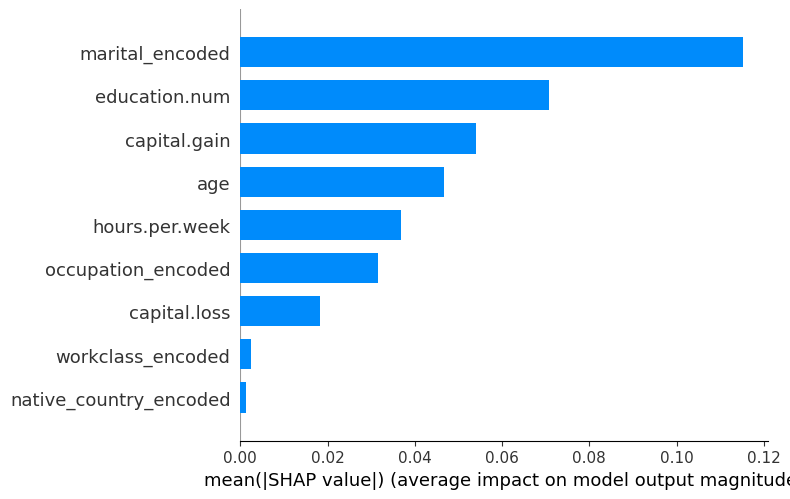

In [153]:
shap.summary_plot(shap_vals, X_val, plot_type="bar")


## Unión 3 métodos

In [155]:
df_importances = (
    df_rf_imp[['feature', 'rf_importance']]
    .merge(
        df_perm[['feature', 'perm_importance_mean']],
        on='feature',
        how='outer'
    )
    .merge(
        df_shap_imp[['feature', 'shap_imp']],
        on='feature',
        how='outer'
    )
)

df_importances

,feature,rf_importance,perm_importance_mean,shap_imp
0,age,24.975944,0.024613,12.369358
1,capital.gain,15.018834,0.045924,14.316758
2,capital.loss,4.733677,0.014220,4.861742
3,education.num,14.550189,0.037352,18.764927
4,hours.per.week,12.887772,0.013208,9.787112
5,marital_encoded,18.767098,0.117258,30.558797
6,native_country_encoded,2.252893,0.000236,0.332070
7,occupation_encoded,3.377805,0.008167,8.372806
8,workclass_encoded,3.435789,0.000692,0.636430


In [157]:
df_filt = df_importances[
    (df_importances['rf_importance'] >= 1) &
    (df_importances['shap_imp'] >= 1) &
    (df_importances['perm_importance_mean'] >= 0.001)
]
df_filt

,feature,rf_importance,perm_importance_mean,shap_imp
0,age,24.975944,0.024613,12.369358
1,capital.gain,15.018834,0.045924,14.316758
2,capital.loss,4.733677,0.014220,4.861742
3,education.num,14.550189,0.037352,18.764927
4,hours.per.week,12.887772,0.013208,9.787112
5,marital_encoded,18.767098,0.117258,30.558797
7,occupation_encoded,3.377805,0.008167,8.372806


In [159]:
features = df_filt['feature']
features

,feature
0,age
1,capital.gain
2,capital.loss
3,education.num
4,hours.per.week
5,marital_encoded
7,occupation_encoded


In [162]:


X_vif = add_constant(X_train_imp[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
age,1.402637
capital.gain,1.035989
capital.loss,1.029279
education.num,1.394343
hours.per.week,1.054123
marital_encoded,1.412117
occupation_encoded,1.345519


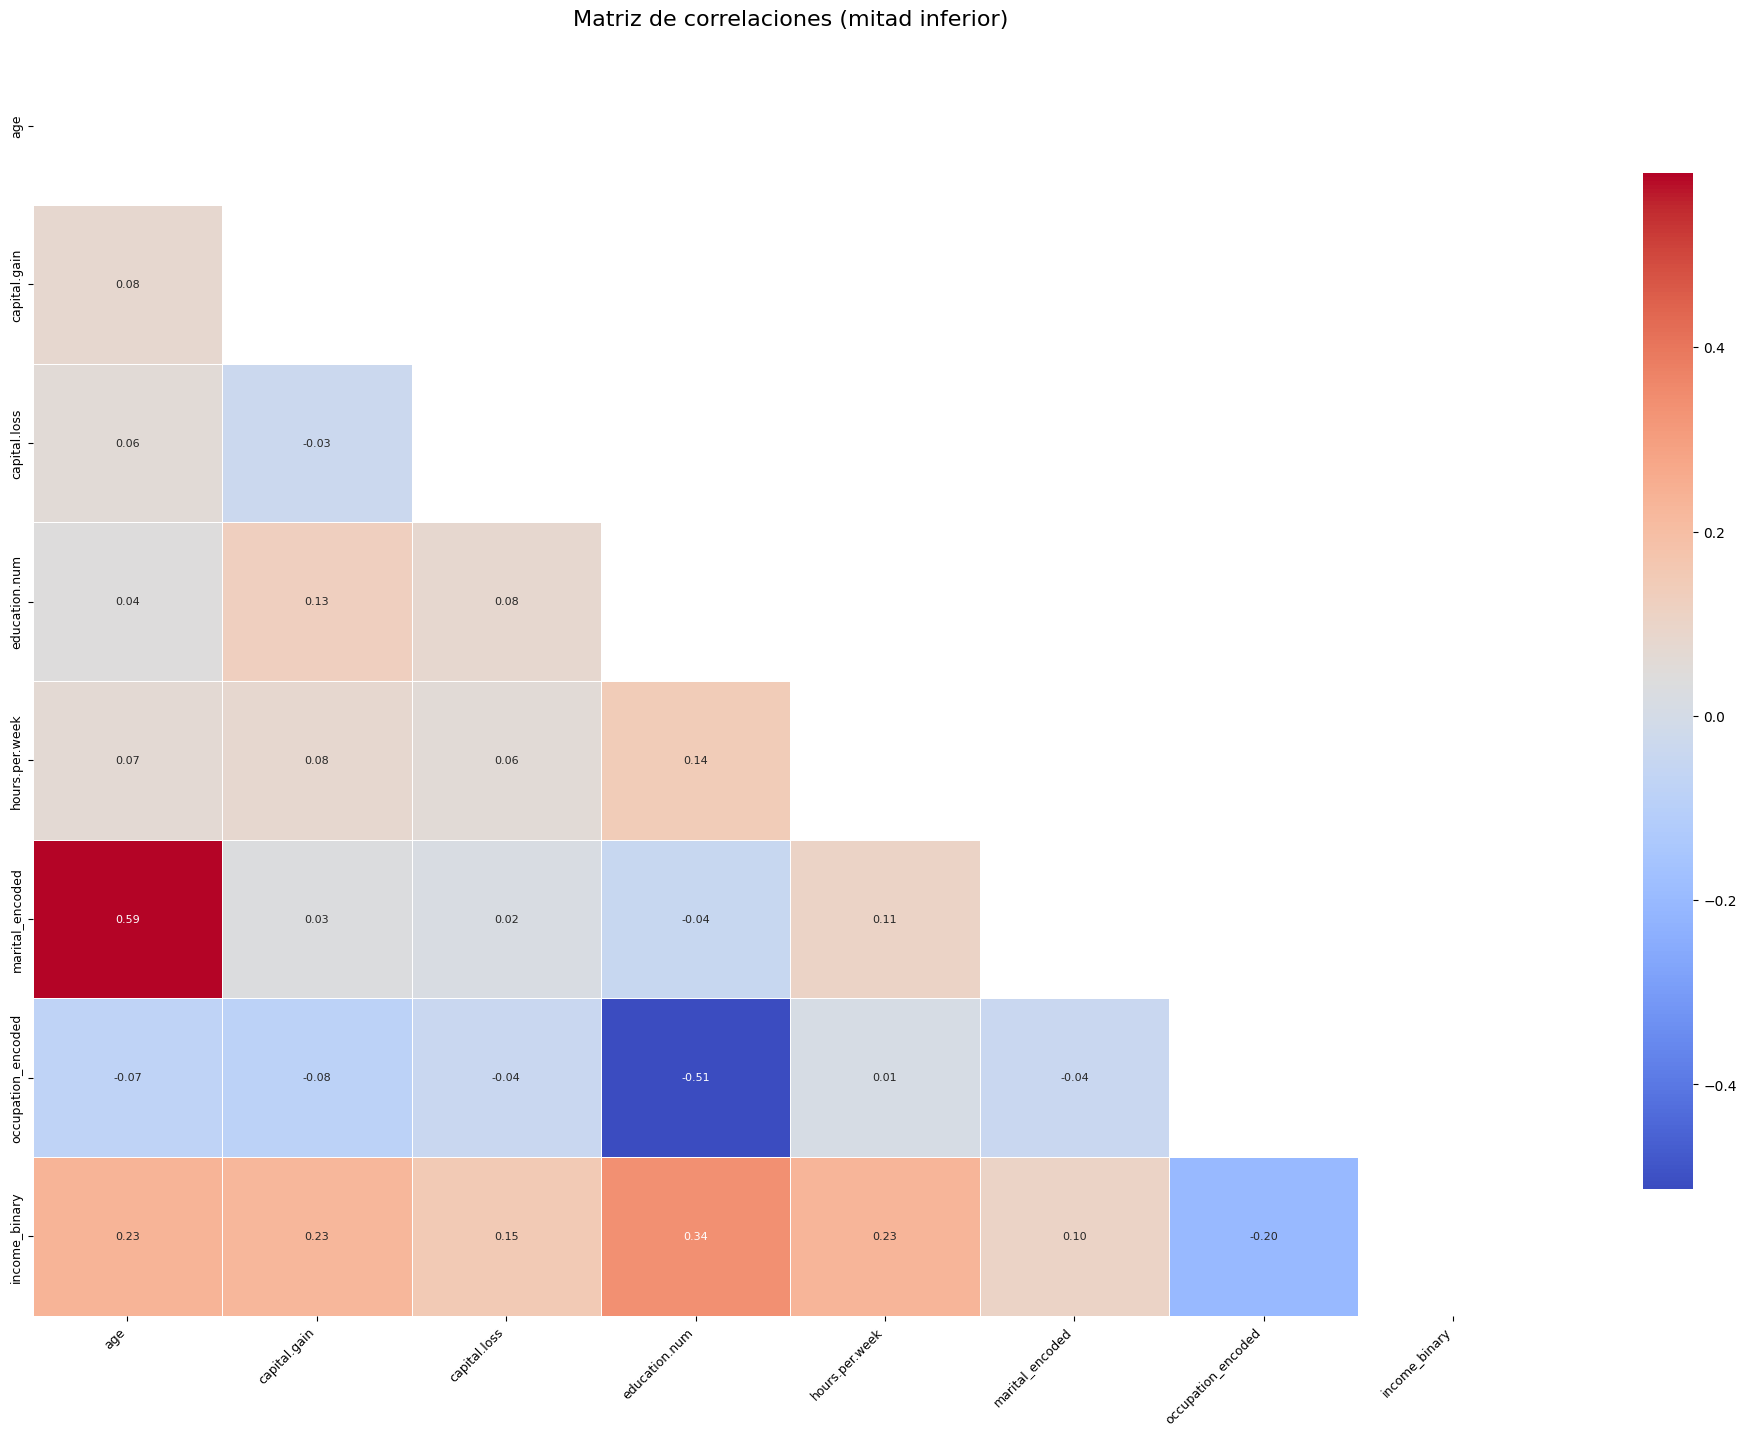

In [168]:
X_copy = X_train[features].copy()
X_copy['income_binary'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

## **16. Guardar el Modelo**

In [170]:
model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("ROC-AUC:", roc_auc_score(y_val, y_prob))
print(classification_report(y_val, y_pred))

ROC-AUC: 0.8521354298223457
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3922
           1       0.97      0.20      0.33      1284

    accuracy                           0.80      5206
   macro avg       0.88      0.60      0.61      5206
weighted avg       0.84      0.80      0.75      5206



## **18. Sistema de Recomendación**

Qué se quiere recomendar? cambios plausibles en el perfil socioeconómico que aumenten la probabilidad de ganar >50K.

Variables más importantes de forma consistente:

marital_encoded ⭐⭐⭐

education.num ⭐⭐⭐

marital_encoded tiene:

Alta importancia en RF

Muy alta en Permutation

Los resultados muestran que las variables más influyentes son el estado civil, el nivel educativo, las ganancias de capital, la edad y las horas trabajadas por semana. Estas variables aparecen de forma consistente como relevantes en los tres métodos, lo que refuerza la robustez de los hallazgos.

En particular, el nivel educativo y el estado civil presentan una fuerte asociación con mayores ingresos, lo que sugiere que trayectorias educativas más largas y contextos familiares estables están correlacionados con mejores resultados económicos.

## **19. Simulación**

Para un usuario hipotético de 30 años, con educación secundaria, ocupación en servicios y 40 horas semanales, el modelo predice una baja probabilidad de superar los 50,000 USD anuales. Sin embargo, al simular un aumento en el nivel educativo y un cambio hacia ocupaciones técnicas, la probabilidad aumenta significativamente. Esto sugiere que las trayectorias educativas y ocupacionales son factores clave para mejorar el ingreso esperado.